<a href="https://colab.research.google.com/github/anandha2017/simple-github-test/blob/master/TrialBalanceMontecarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Parameters
num_accounts = 6000 # 30 accounts per day, 30 days in a month, 6 months
min_balance  = 1000
max_balance  = 500000
mean_balance = 2500
sigma = 0.5 # Standard deviation (adjust to control the spread)
num_simulations = 5000
num_days = 30
annual_interest_rate = 0.05
daily_interest_rate = annual_interest_rate / 365
verbosity_level = 0  # Adjust as needed for debugging; 0, 1 or 2

In [73]:
def monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate, verbosity=0):
    differences = []
    for sim in range(num_simulations):
        if verbosity > 0:
            print(f"\nStarting Simulation {sim + 1}/{num_simulations}")

        # Generate random balances using a log-normal distribution
        mu = np.log(mean_balance)  # Mean of the underlying normal distribution
        balances = np.random.lognormal(mean=mu, sigma=sigma, size=(num_accounts, num_days))
        balances = np.clip(balances, min_balance, max_balance)
        if verbosity > 1:
            print(f"Balances for Simulation {sim + 1}:")
            print(balances)

        if verbosity > 2:
            # Flatten the balances array to a 1D array for plotting
            flattened_balances = balances.flatten()

            # Plot the histogram
            plt.figure(figsize=(10, 6))
            plt.hist(flattened_balances, bins=100, edgecolor='k', range=(min_balance, max_balance))
            plt.title('Distribution of Account Balances')
            plt.xlabel('Balance (£)')
            plt.ylabel('Frequency')
            plt.xlim(min_balance, max_balance)
            plt.grid(True)
            plt.show()

        # Calculate daily accruals to 10 decimal places
        daily_accruals = np.round(balances * daily_interest_rate, 10)
        if verbosity > 1:
            print(f"Daily Accruals for Simulation {sim + 1}:")
            print(daily_accruals)

        # Method 1: Sum daily accruals per account, then round to 2 decimal places
        method1_interest = np.round(np.sum(daily_accruals, axis=1), 2)
        if verbosity > 1:
            print(f"Method 1 Interest for Simulation {sim + 1}:")
            print(method1_interest)

        # Method 2: Round daily accruals to 2 decimal places per day, then sum per account
        method2_interest = np.sum(np.round(daily_accruals, 2), axis=1)
        if verbosity > 1:
            print(f"Method 2 Interest for Simulation {sim + 1}:")
            print(method2_interest)

        # Sum all interest from Method 1
        total_interest_method1 = np.sum(method1_interest)

        # Sum all interest from Method 2
        total_interest_method2 = np.sum(method2_interest)

        if verbosity > 0:
            print(f"Total Interest Method 1 for Simulation {sim + 1}: {total_interest_method1}")
            print(f"Total Interest Method 2 for Simulation {sim + 1}: {total_interest_method2}")

        # Calculate the difference between the total interests
        difference = total_interest_method1 - total_interest_method2
        if verbosity > 0:
            print(f"Difference between methods for Simulation {sim + 1}: {difference}")

        # Append the difference to the list
        differences.append(difference)

        # Optional: Print progress every 100 simulations if verbosity is 0
        if verbosity == 0 and (sim + 1) % 100 == 0:
            print(f"Simulation {sim + 1}/{num_simulations} completed")

    return differences

In [74]:
# Run the simulation
differences = monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate, verbosity=verbosity_level)

Simulation 100/5000 completed
Simulation 200/5000 completed
Simulation 300/5000 completed
Simulation 400/5000 completed
Simulation 500/5000 completed
Simulation 600/5000 completed
Simulation 700/5000 completed
Simulation 800/5000 completed
Simulation 900/5000 completed
Simulation 1000/5000 completed
Simulation 1100/5000 completed
Simulation 1200/5000 completed
Simulation 1300/5000 completed
Simulation 1400/5000 completed
Simulation 1500/5000 completed
Simulation 1600/5000 completed
Simulation 1700/5000 completed
Simulation 1800/5000 completed
Simulation 1900/5000 completed
Simulation 2000/5000 completed
Simulation 2100/5000 completed
Simulation 2200/5000 completed
Simulation 2300/5000 completed
Simulation 2400/5000 completed
Simulation 2500/5000 completed
Simulation 2600/5000 completed
Simulation 2700/5000 completed
Simulation 2800/5000 completed
Simulation 2900/5000 completed
Simulation 3000/5000 completed
Simulation 3100/5000 completed
Simulation 3200/5000 completed
Simulation 3300/5

In [54]:
# Convert to NumPy array
differences = np.array(differences)


Simulation Results:
Average Total Difference: £-97.52
Maximum Total Difference: £-93.74
Minimum Total Difference: £-100.84
Standard Deviation: £1.21


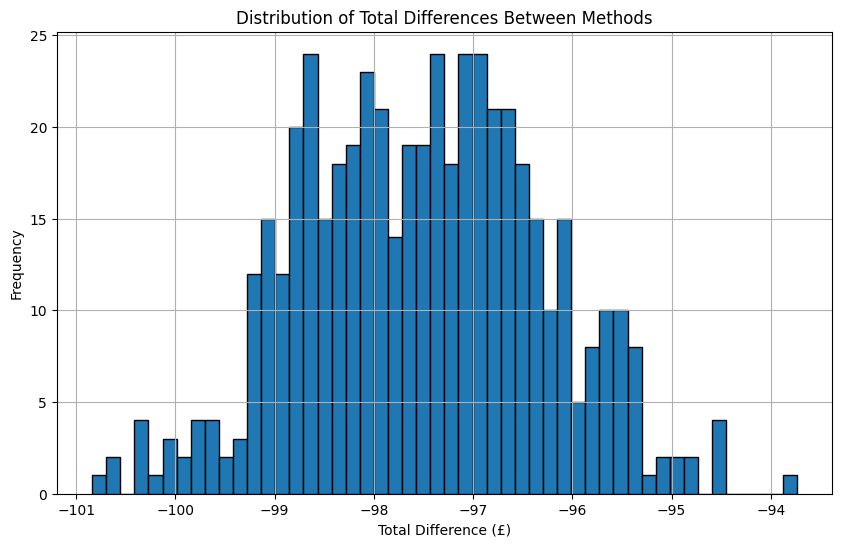

In [55]:
# Analysis
average_difference = np.mean(differences)
max_difference = np.max(differences)
min_difference = np.min(differences)
std_dev_difference = np.std(differences)

print("\nSimulation Results:")
print(f"Average Total Difference: £{average_difference:.2f}")
print(f"Maximum Total Difference: £{max_difference:.2f}")
print(f"Minimum Total Difference: £{min_difference:.2f}")
print(f"Standard Deviation: £{std_dev_difference:.2f}")

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, edgecolor='k')
plt.title('Distribution of Total Differences Between Methods')
plt.xlabel('Total Difference (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()